# Costa Rica Poverty Prediction

In [26]:
# %pip install 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Exploratory analysis

In [28]:
df = pd.read_csv('train.csv')
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [29]:
# get dependency column from sq dependency
# print(sorted(df['dependency'].unique()))
# df['dependency'].value_counts()
# df['SQBdependency'].value_counts()
df['dependency'] = [np.sqrt(x) for x in df['SQBdependency']]

# clean out strings from numeric education
for col in ['edjefe','edjefa']:
    df.loc[df[col]=='yes',col] = np.nan
    df.loc[df[col]=='no',col] = 0
    df[col] = [float(x) for x in df[col]]

# look at unique values
cols = df.columns[73:].tolist()
for col in cols:
    vals = sorted(df[col].unique())[:5]
    vals.append(vals[-1])
    print(f"{col}: {set(vals)}")

dis: {0, 1}
male: {0, 1}
female: {0, 1}
estadocivil1: {0, 1}
estadocivil2: {0, 1}
estadocivil3: {0, 1}
estadocivil4: {0, 1}
estadocivil5: {0, 1}
estadocivil6: {0, 1}
estadocivil7: {0, 1}
parentesco1: {0, 1}
parentesco2: {0, 1}
parentesco3: {0, 1}
parentesco4: {0, 1}
parentesco5: {0, 1}
parentesco6: {0, 1}
parentesco7: {0, 1}
parentesco8: {0, 1}
parentesco9: {0, 1}
parentesco10: {0, 1}
parentesco11: {0, 1}
parentesco12: {0, 1}
idhogar: {'001ff74ca', '004616164', '005905417', '003123ec2', '004983866'}
hogar_nin: {0, 1, 2, 3, 4}
hogar_adul: {0, 1, 2, 3, 4}
hogar_mayor: {0, 1, 2, 3}
hogar_total: {1, 2, 3, 4, 5}
dependency: {0.0, 0.16666667333333318, 0.2222222221111109, 0.20000000749999985, 0.25}
edjefe: {0.0, 2.0, 3.0, 4.0, 5.0}
edjefa: {0.0, 2.0, 3.0, 4.0, 5.0}
meaneduc: {0.0, 1.5, 2.3333333, 2.6666667, 3.3333333}
instlevel1: {0, 1}
instlevel2: {0, 1}
instlevel3: {0, 1}
instlevel4: {0, 1}
instlevel5: {0, 1}
instlevel6: {0, 1}
instlevel7: {0, 1}
instlevel8: {0, 1}
instlevel9: {0, 1}
bedroo

In [30]:
pd.set_option('display.max_rows', 500)

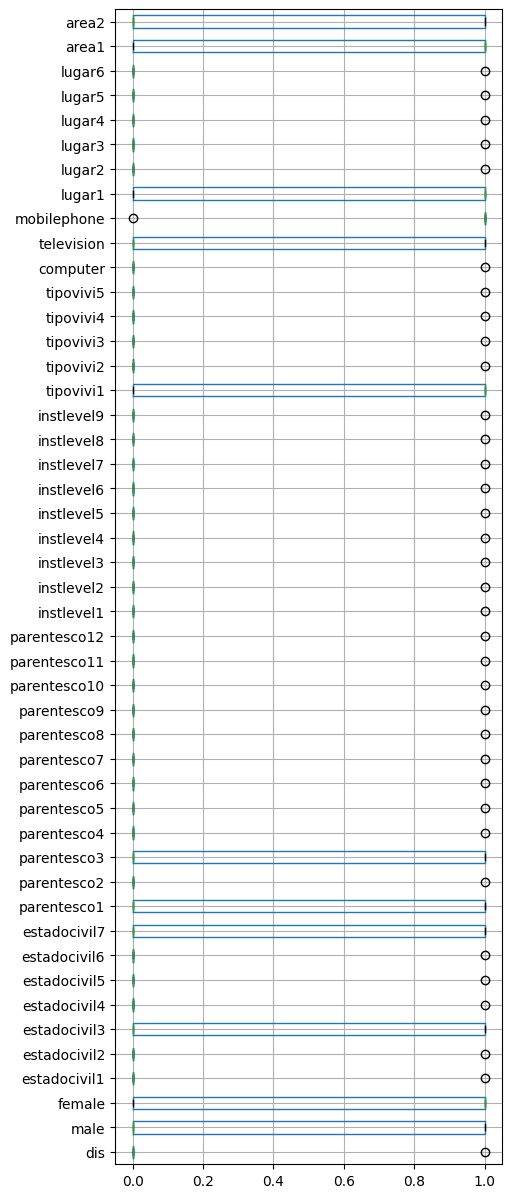

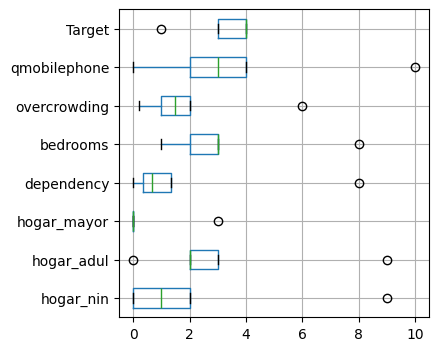

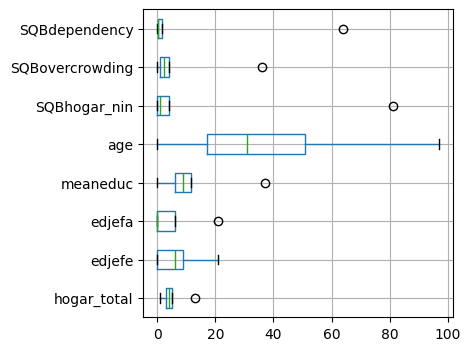

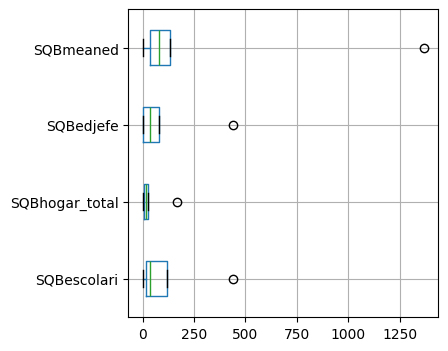

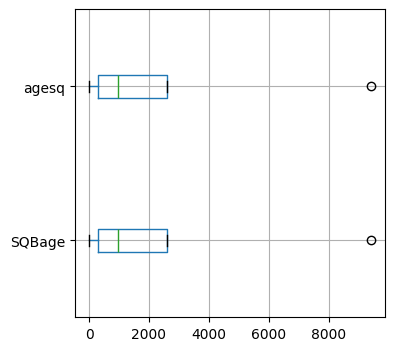

In [31]:
df2 = df.iloc[:,73:]
df2 = df2[[x for x in df2.columns if not isinstance(df2.loc[0,x],str)]]
for m in [1,10,100,5000,10000]:
    if m==1:
        fsize=(5,15)
    else:
        fsize=(4,4)
    plt.figure(figsize=fsize)
    summary = df2[[x for x in df2.columns if max(df2[x])<=m]].describe()
    df2 = df2[[x for x in df2.columns if max(df2[x])>m]]
    summary = summary.T[['min','25%','50%','75%','max']].T
    summary.boxplot(vert=False)
    plt.show()

In [32]:
# calculate percentages
for col in df[cols].columns:
    print(df[col].value_counts(normalize=True).reset_index()[:5])

   dis  proportion
0    0    0.942451
1    1    0.057549
   male  proportion
0     0    0.516585
1     1    0.483415
   female  proportion
0       1    0.516585
1       0    0.483415
   estadocivil1  proportion
0             0    0.862195
1             1    0.137805
   estadocivil2  proportion
0             0     0.87674
1             1     0.12326
   estadocivil3  proportion
0             0     0.73161
1             1     0.26839
   estadocivil4  proportion
0             0    0.968086
1             1    0.031914
   estadocivil5  proportion
0             0    0.937219
1             1    0.062781
   estadocivil6  proportion
0             0    0.966831
1             1    0.033169
   estadocivil7  proportion
0             0    0.657319
1             1    0.342681
   parentesco1  proportion
0            0    0.688919
1            1    0.311081
   parentesco2  proportion
0            0    0.815946
1            1    0.184054
   parentesco3  proportion
0            0    0.618186
1            

In [33]:
# calculate missing
for col in df[cols].columns:
    n = sum(df[col].isnull())
    if n>0:
        print(f"{col}: {n} {round(n/len(df),3)}")

edjefe: 123 0.013
edjefa: 69 0.007
meaneduc: 5 0.001
SQBmeaned: 5 0.001


In [48]:
df.to_csv('cleaned.csv',index=None)

In [46]:
train, test = train_test_split(df.drop(columns=['Id','idhogar']), test_size = .3)
valid, test = train_test_split(test, test_size = .1)

In [47]:
X_train = train.drop(columns='Target')
y_train = train['Target']
X_valid = valid.drop(columns='Target')
y_valid = valid['Target']
X_test = test.drop(columns='Target')
y_test = test['Target']

## Tuning: NN Classifier

In [ ]:
df = pd.read_csv('cleaned.csv')

In [8]:
from sklearn.neural_network import MLPClassifier

In [10]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'id

In [45]:
alphas = np.power(10.0,np.arange(-4,-1))
scores = []

for alpha in alphas:
    mlp = MLPClassifier(alpha=alpha)
    mlp.fit(X_train,y_train)
    scores.append(mlp.score())


ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
# X_train.select_dtypes(include=['object'])
X_train.head(2)


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
1100,400000.0,0,6,0,1,1,1,1.0,0,2,...,52,256,2704,16,121,0,1.777778,0.00,196.00,2704
9489,NaN,0,4,0,1,1,0,NaN,0,3,...,32,36,1024,25,81,9,6.250000,2.25,56.25,1024


In [7]:
from sklearn.ensemble import VotingRegressor
